In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv(r'C:\Users\91940\Downloads\dhaka_air_quality_2000_2025.csv')
print(df)

                   datetime         AQI       PM2.5        PM10         O3  \
0       2000-01-01 00:00:00  121.861086   44.200712   93.224101  20.586862   
1       2000-01-01 01:00:00   99.598077   35.212704   78.893066  22.429471   
2       2000-01-01 02:00:00  132.852834   48.575428  118.693959  37.838094   
3       2000-01-01 03:00:00  154.588259   64.208516   86.427166  26.747684   
4       2000-01-01 04:00:00  114.102260   41.112699   70.193382  33.192759   
...                     ...         ...         ...         ...        ...   
225811  2025-10-04 19:00:00  207.114725  157.607611  243.872762  46.377704   
225812  2025-10-04 20:00:00  206.927397  157.420470  243.006506  39.320982   
225813  2025-10-04 21:00:00  191.182348  133.664097  222.090884  47.043134   
225814  2025-10-04 22:00:00  176.907248  106.569957  169.771198  41.824699   
225815  2025-10-04 23:00:00  187.985824  127.597094  230.334810  38.649642   

              NO2        SO2        CO  Temperature   Humidity 

In [43]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 225816 entries, 0 to 225815
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     225816 non-null  str    
 1   AQI          225816 non-null  float64
 2   PM2.5        225816 non-null  float64
 3   PM10         225816 non-null  float64
 4   O3           225816 non-null  float64
 5   NO2          225816 non-null  float64
 6   SO2          225816 non-null  float64
 7   CO           225816 non-null  float64
 8   Temperature  225816 non-null  float64
 9   Humidity     225816 non-null  float64
 10  Wind_Speed   225816 non-null  float64
 11  Pressure     225816 non-null  float64
dtypes: float64(11), str(1)
memory usage: 20.7 MB
None


In [44]:
print(df.describe())

                 AQI          PM2.5           PM10             O3  \
count  225816.000000  225816.000000  225816.000000  225816.000000   
mean      173.879455     105.495390     178.668865      50.070796   
std        47.853187      55.878730      95.030366      18.186844   
min        20.833333       5.000000      10.000000       5.000000   
25%       153.495856      62.135134     105.427706      37.130329   
50%       171.495329      96.298134     164.382639      48.391279   
75%       194.740957     140.418337     240.081570      61.145886   
max       299.599600     250.000000     400.000000     124.493286   

                 NO2            SO2             CO    Temperature  \
count  225816.000000  225816.000000  225816.000000  225816.000000   
mean       34.295663      23.082057       1.644556      26.042161   
std        12.189406       7.695508       0.535873       5.142185   
min         5.000000       2.000000       0.100000      10.345658   
25%        25.622285      17.7217

In [45]:
df.shape

(225816, 12)

In [53]:
df.columns

Index(['datetime', 'AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO',
       'Temperature', 'Humidity', 'Wind_Speed', 'Pressure', 'Year', 'Month',
       'Day', 'Hour', 'Day_of_Week'],
      dtype='str')

In [46]:
# 1️ Total missing values in entire dataset
print("Total Missing Values in Dataset:")
print(df.isnull().sum().sum())

# 2️ Missing values column-wise
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# 3️ Percentage of missing values per column
print("\nPercentage of Missing Values Per Column:")
print((df.isnull().sum() / len(df)) * 100)

Total Missing Values in Dataset:
0

Missing Values Per Column:
datetime       0
AQI            0
PM2.5          0
PM10           0
O3             0
NO2            0
SO2            0
CO             0
Temperature    0
Humidity       0
Wind_Speed     0
Pressure       0
dtype: int64

Percentage of Missing Values Per Column:
datetime       0.0
AQI            0.0
PM2.5          0.0
PM10           0.0
O3             0.0
NO2            0.0
SO2            0.0
CO             0.0
Temperature    0.0
Humidity       0.0
Wind_Speed     0.0
Pressure       0.0
dtype: float64


In [47]:
print(df.head())

              datetime         AQI      PM2.5        PM10         O3  \
0  2000-01-01 00:00:00  121.861086  44.200712   93.224101  20.586862   
1  2000-01-01 01:00:00   99.598077  35.212704   78.893066  22.429471   
2  2000-01-01 02:00:00  132.852834  48.575428  118.693959  37.838094   
3  2000-01-01 03:00:00  154.588259  64.208516   86.427166  26.747684   
4  2000-01-01 04:00:00  114.102260  41.112699   70.193382  33.192759   

         NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
0  15.391414  28.219932  1.049477    20.956667  71.272569    8.375675   
1  26.824534  24.385188  0.943859    13.761031  42.616871   10.880553   
2  33.403493  28.951413  0.887131    20.216907  59.169387   15.041183   
3  12.137395  26.950990  0.793261    18.642574  62.756439    9.904413   
4  25.313206  20.741976  1.059887    18.834718  56.369280   14.632070   

      Pressure  
0  1011.742574  
1  1010.949986  
2  1012.065387  
3  1010.162227  
4  1007.067421  


In [48]:
# Make sure datetime is in proper format
df["datetime"] = pd.to_datetime(df["datetime"])

# Extract useful time features
df["Year"] = df["datetime"].dt.year
df["Month"] = df["datetime"].dt.month
df["Day"] = df["datetime"].dt.day
df["Hour"] = df["datetime"].dt.hour
df["Day_of_Week"] = df["datetime"].dt.dayofweek

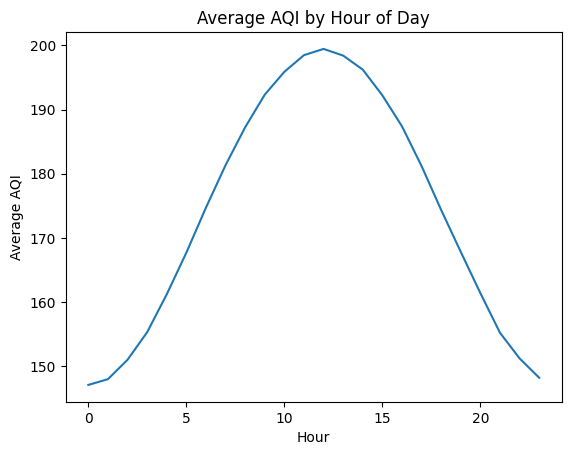

In [49]:
hourly_aqi = df.groupby("Hour")["AQI"].mean()

plt.figure()
plt.plot(hourly_aqi.index, hourly_aqi.values)
plt.title("Average AQI by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average AQI")
plt.show()

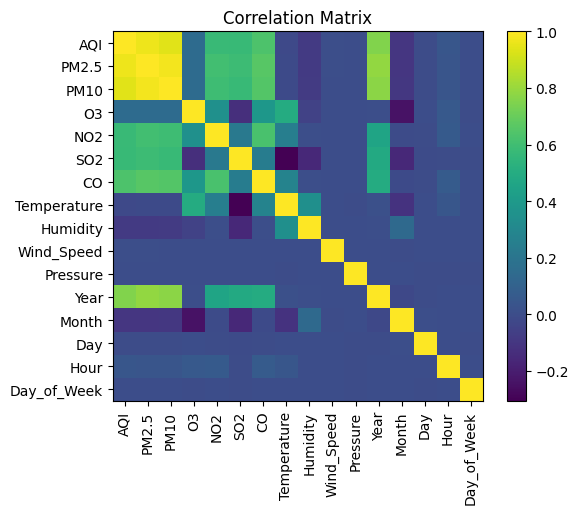

In [50]:
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

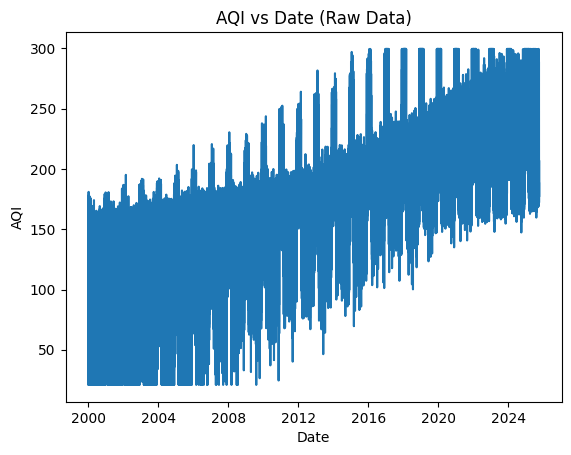

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert datetime
df["datetime"] = pd.to_datetime(df["datetime"])

# Sort properly
df = df.sort_values("datetime")

# Plot raw AQI
plt.figure()
plt.plot(df["datetime"], df["AQI"])
plt.title("AQI vs Date (Raw Data)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

Correlation between AQI and PM2.5: 0.9655355747990203


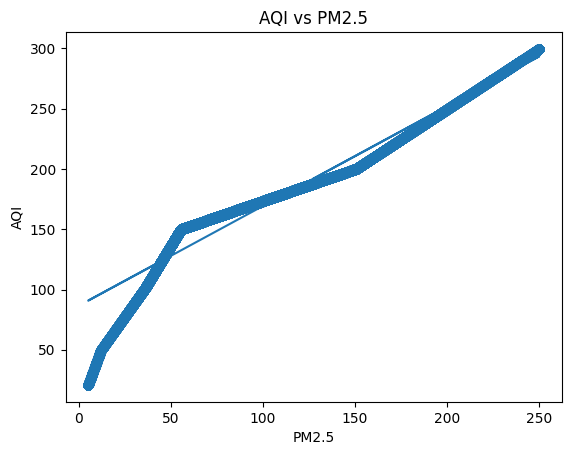

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation
correlation = df["AQI"].corr(df["PM2.5"])
print("Correlation between AQI and PM2.5:", correlation)

# Create scatter plot
plt.figure()
plt.scatter(df["PM2.5"], df["AQI"])

# Fit regression line (y = mx + b)
m, b = np.polyfit(df["PM2.5"], df["AQI"], 1)
plt.plot(df["PM2.5"], m * df["PM2.5"] + b)

plt.title("AQI vs PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.show()

#corr() → gives strength of relationship

#np.polyfit() → finds best-fit line

#Regression line helps visualize linear dependency